In [1]:
import pandas as pd
data=pd.read_csv("/content/Womenlf.csv")
print(data)

     rownames    partic  hincome children   region
0           1  not.work       15  present  Ontario
1           2  not.work       13  present  Ontario
2           3  not.work       45  present  Ontario
3           4  not.work       23  present  Ontario
4           5  not.work       19  present  Ontario
..        ...       ...      ...      ...      ...
258       259  not.work       15   absent   Quebec
259       260  not.work       15  present   Quebec
260       261  not.work       11  present   Quebec
261       262  not.work       11   absent   Quebec
262       263  not.work       15  present   Quebec

[263 rows x 5 columns]


In [3]:
data.isna().sum()

rownames    0
partic      0
hincome     0
children    0
region      0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data['partic']=b.fit_transform(data['partic'])
data['children']=b.fit_transform(data['children'])
data['region']=b.fit_transform(data['region'])
print(data)

     rownames  partic  hincome  children  region
0           1       1       15         1       2
1           2       1       13         1       2
2           3       1       45         1       2
3           4       1       23         1       2
4           5       1       19         1       2
..        ...     ...      ...       ...     ...
258       259       1       15         0       4
259       260       1       15         1       4
260       261       1       11         1       4
261       262       1       11         0       4
262       263       1       15         1       4

[263 rows x 5 columns]


In [6]:
x=data.drop("region",axis=1)
y=data["region"]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain,ytrain)

     rownames  partic  hincome  children
117       118       1       19         0
8           9       1       15         1
151       152       0       13         0
249       250       0       15         0
90         91       1       35         0
..        ...     ...      ...       ...
24         25       1       23         1
139       140       1       28         1
179       180       0       13         0
56         57       1       23         1
111       112       0       17         1

[257 rows x 4 columns] 117    1
8      2
151    1
249    4
90     2
      ..
24     2
139    2
179    1
56     0
111    0
Name: region, Length: 257, dtype: int64


In [9]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
c=br.predict([[264,1,27,0]])
print(c)

[4]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([[ 4.,  0., 14.,  0.,  0., 33.,  0.,  5.,  0., 23.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0., 15.,  0.,  0., 75.,  0., 26.,  0., 42.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <matplotlib.collections.QuadMesh at 0x7985881ee590>)

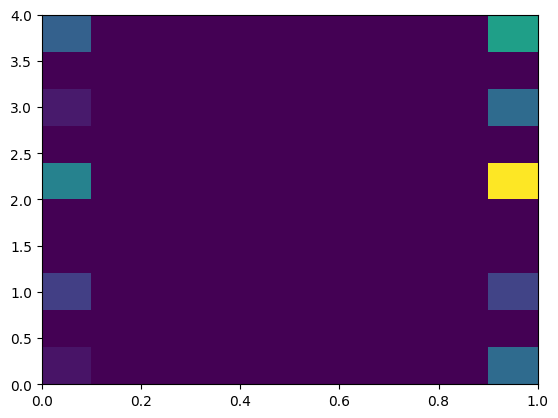

In [12]:
from matplotlib import pyplot as plt
plt.hist2d(data["children"],data["region"])

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[0 1 0 1]
 [0 2 1 0]
 [0 0 0 0]
 [0 0 0 1]]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.5


In [15]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1

    accuracy                           0.50         6
   macro avg       0.29      0.42      0.33         6
weighted avg       0.42      0.50      0.44         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_